# Demo 1: Fallzahlen, Genesungen, und Todesfällen Vergleichen

## Importing Dependencies

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wgts
from IPython.display import display
import numpy as np

## Loading Datasets

In [35]:
# test data read
covid_19_dataset = pd.read_csv('../dataset/cleaned_dataset.csv')
regions_dataset = pd.read_csv('../dataset/Countries by continents.csv')

## Creating Widgets

### Creating Countries & Continents Dropdown Menus

In [36]:
countries_dropdown_menu = wgts.Dropdown(
    options= regions_dataset['Country'].unique(),
    description='Country:',
    disabled=False,
)

continent_dropdown_menu = wgts.Dropdown(
    options= regions_dataset['Continent'].unique(),
    description='Continent:',
    disabled=False,
)

### Creating Regional Category Radio Button

In [37]:
regional_category_radio = wgts.RadioButtons(
    options=['Country', 'Region', 'World'],
    description='Regional Category:',
    disabled=False
)

### Creating Time Category Radio Button

In [38]:
time_category_radio = wgts.RadioButtons(
    options=['Daily', 'Monthly', 'Yearly', 'Complete'],
    description='Time Category:',
    disabled=False
)

### Creating Months, Years Dropdown Menus & Day DatePicker

In [39]:
import datetime
# minimum date value in dataset
dateMin = datetime.datetime.strptime(covid_19_dataset['Date'].min(), '%Y-%m-%d').date()
# maximum date value in dataset
dateMax = datetime.datetime.strptime(covid_19_dataset['Date'].max(), '%Y-%m-%d').date()

day_datepicker = wgts.DatePicker(
    description='Day:',
    disabled=False,
    max=dateMax,
    min=dateMin
)

year_dropdown_menu = wgts.Dropdown(
    options= range(dateMin.year, dateMax.year + 1),
    description='Year:',
    disabled=False,
)

month_dropdown_menu = wgts.Dropdown(
    options= ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"],
    description='Month:',
    disabled=False,
)

### Creating Reload Button

In [40]:
reload_button = wgts.Button(
    description='Reload',
    disabled=False,
    button_style='info',
    tooltip='Reload',
    icon='check'
)

## Plotting Functions

### Country By Day

In [41]:
def plot_country_by_day(country:str, day:str):
    df = pd.DataFrame(covid_19_dataset)

    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Target date
    target_date = day

    # 1. Get Country's data for the target date
    date_filter = df['Date'] == pd.to_datetime(target_date)
    target_df = df[date_filter]
    country_on_date = target_df[target_df['Country'] == country]
    country_date_values = country_on_date[['Confirmed', 'Recovered', 'Deaths']].values[0]

    # 2. Calculate average for Country across all days
    country_all_days = df[df['Country'] == country]
    country_avg_values = country_all_days[['Confirmed', 'Recovered', 'Deaths']].mean().values

    # 3. Calculate averages for all countries on the target date
    all_countries_date_avg = target_df[['Confirmed', 'Recovered', 'Deaths']].mean().values

    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.25  # Narrower bars to fit three side by side

    fig, ax = plt.subplots(figsize=(8, 5))

    # Create the three sets of bars
    bar1 = ax.bar(x - width, country_date_values, width, label=f'{country} on {target_date}', color='#1f77b4')
    bar2 = ax.bar(x, country_avg_values, width, label=f'{country} Average (All Days)', color='#ff7f0e')
    bar3 = ax.bar(x + width, all_countries_date_avg, width, label=f'All Countries Average on {target_date}', color='#2ca02c')

    # Add labels, title and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=9)
    ax.set_ylabel('Number of Cases', fontsize=9)
    ax.set_title(f'COVID-19 Statistics Comparison for {country}\n{target_date}', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.legend(fontsize=9)

    # Add counts above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)

    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Print the numerical results for reference
    print(f"{country} values on {target_date}:")
    for category, value in zip(categories, country_date_values):
        print(f"  {category}: {value:.0f}")

    print(f"\n{country} average across all days:")
    for category, value in zip(categories, country_avg_values):
        print(f"  {category}: {value:.2f}")

    print(f"\nAll countries average on {target_date}:")
    for category, value in zip(categories, all_countries_date_avg):
        print(f"  {category}: {value:.2f}")

    plt.tight_layout()
    plt.show()

### Country By Month

In [42]:
def plot_country_by_month(country: str, month: str, year: str):
    df = pd.DataFrame(covid_19_dataset)
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert month and year to integer
    year_num = int(year)
    month_num = int(month)
    
    # Filter the dataset for the specified month and year
    month_filter = (df['Date'].dt.month == month_num) & (df['Date'].dt.year == year_num)
    month_df = df[month_filter]
    
    # 1. Get Country's data for the target month (averages)
    country_month_df = month_df[month_df['Country'] == country]
    country_month_avg = country_month_df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # 2. Calculate the country's average across all recorded days
    country_all_days = df[df['Country'] == country]
    country_avg_values = country_all_days[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # 3. Calculate averages for all countries on the target month
    all_countries_month_avg = month_df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.25  # Narrower bars to fit three side by side
    
    fig, ax = plt.subplots(figsize=(8, 5))

    month_name = pd.to_datetime(f"{year}-{month}-01").strftime('%B')
    
    # Create the three sets of bars
    bar1 = ax.bar(x - width, country_month_avg, width, label=f'{country} in {month}/{year}', color='#1f77b4')
    bar2 = ax.bar(x, country_avg_values, width, label=f'{country} Average (All Time)', color='#ff7f0e')
    bar3 = ax.bar(x + width, all_countries_month_avg, width, label=f'All Countries Average in {month}/{year}', color='#2ca02c')
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=9)
    ax.set_ylabel('Number of Cases', fontsize=9)
    ax.set_title(f'COVID-19 Statistics Comparison for {country} ({month}/{year})', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.legend(fontsize=9)
    
    # Add counts above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Print the numerical results for reference
    print(f"{country} values in {month}/{year}:")
    for category, value in zip(categories, country_month_avg):
        print(f"  {category}: {value:.0f}")
    
    print(f"\n{country} average across all recorded days:")
    for category, value in zip(categories, country_avg_values):
        print(f"  {category}: {value:.2f}")
    
    print(f"\nAll countries average in {month_name}/{year}:")
    for category, value in zip(categories, all_countries_month_avg):
        print(f"  {category}: {value:.2f}")
    
    plt.tight_layout()
    plt.show()

### Country By Year

In [43]:
def plot_country_by_year(country: str, year: str):
    df = pd.DataFrame(covid_19_dataset)
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert year to integer
    year = int(year)
    
    # Filter the dataset for the specified year
    year_filter = df['Date'].dt.year == year
    year_df = df[year_filter]
    
    # 1. Get Country's data for the target year (averages)
    country_year_df = year_df[year_df['Country'] == country]
    country_year_avg = country_year_df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # 2. Calculate the country's average across all recorded days
    country_all_days = df[df['Country'] == country]
    country_avg_values = country_all_days[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # 3. Calculate averages for all countries in the target year
    all_countries_year_avg = year_df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.25  # Narrower bars to fit three side by side
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Create the three sets of bars
    bar1 = ax.bar(x - width, country_year_avg, width, label=f'{country} in {year}', color='#1f77b4')
    bar2 = ax.bar(x, country_avg_values, width, label=f'{country} Average (All Time)', color='#ff7f0e')
    bar3 = ax.bar(x + width, all_countries_year_avg, width, label=f'All Countries Average in {year}', color='#2ca02c')
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=9)
    ax.set_ylabel('Number of Cases', fontsize=9)
    ax.set_title(f'COVID-19 Statistics Comparison for {country} ({year})', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.legend(fontsize=9)
    
    # Add counts above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Print the numerical results for reference
    print(f"{country} values in {year}:")
    for category, value in zip(categories, country_year_avg):
        print(f"  {category}: {value:.0f}")
    
    print(f"\n{country} average across all recorded days:")
    for category, value in zip(categories, country_avg_values):
        print(f"  {category}: {value:.2f}")
    
    print(f"\nAll countries average in {year}:")
    for category, value in zip(categories, all_countries_year_avg):
        print(f"  {category}: {value:.2f}")
    
    plt.tight_layout()
    plt.show()

### Country Total

In [51]:
def plot_country_by_total(country: str):
    df = pd.DataFrame(covid_19_dataset)
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Calculate the country's average across all recorded days
    country_all_days = df[df['Country'] == country]
    country_avg_values = country_all_days[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # Calculate global average across all recorded days
    global_avg_values = df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.35  # Wider bars for clear comparison
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Create the two sets of bars
    bar1 = ax.bar(x - width/2, country_avg_values, width, label=f'{country} Average (All Time)', color='#1f77b4')
    bar2 = ax.bar(x + width/2, global_avg_values, width, label='Global Average (All Time)', color='#ff7f0e')
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=9)
    ax.set_ylabel('Number of Cases', fontsize=9)
    ax.set_title(f'COVID-19 Total Statistics Comparison for {country}', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.legend(fontsize=9)
    
    # Add counts above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    add_labels(bar1)
    add_labels(bar2)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Print the numerical results for reference
    print(f"{country} average across all recorded days:")
    for category, value in zip(categories, country_avg_values):
        print(f"  {category}: {value:.2f}")
    
    print(f"\nGlobal average across all recorded days:")
    for category, value in zip(categories, global_avg_values):
        print(f"  {category}: {value:.2f}")
    
    plt.tight_layout()
    plt.show()

### Continent By Day

In [45]:
def plot_continent_by_day(continent: str, day: str):
    df = pd.DataFrame(covid_19_dataset)

    countries = regions_dataset[regions_dataset['Continent'] == continent]
    countries = countries['Country']
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Target date
    target_date = pd.to_datetime(day)
    
    # 1. Get continent's data for the target date
    date_filter = df['Date'] == target_date
    target_df = df[date_filter]
    continent_on_date = target_df[target_df['Country'].isin(countries)]
    continent_date_values = continent_on_date[['Confirmed', 'Recovered', 'Deaths']].sum().values
    
    # 2. Calculate average for continent across all days
    continent_all_days = df[df['Country'].isin(countries)]
    continent_avg_values = continent_all_days[['Confirmed', 'Recovered', 'Deaths']].groupby(df['Date']).sum().mean().values
    
    # 3. Calculate averages for all countries on the target date
    all_countries_date_avg = target_df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.25  # Narrower bars to fit three side by side
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Create the three sets of bars
    bar1 = ax.bar(x - width, continent_date_values, width, label=f'{continent} on {target_date.date()}', color='#1f77b4')
    bar2 = ax.bar(x, continent_avg_values, width, label=f'{continent} Average (All Days)', color='#ff7f0e')
    bar3 = ax.bar(x + width, all_countries_date_avg, width, label=f'Global Average on {target_date.date()}', color='#2ca02c')
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=9)
    ax.set_ylabel('Number of Cases', fontsize=9)
    ax.set_title(f'COVID-19 Statistics Comparison for {continent} {target_date.date()}', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.legend(fontsize=9)
    
    # Add counts above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Print the numerical results for reference
    print(f"{continent} values on {target_date.date()}:")
    for category, value in zip(categories, continent_date_values):
        print(f"  {category}: {value:.0f}")
    
    print(f"\n{continent} average across all days:")
    for category, value in zip(categories, continent_avg_values):
        print(f"  {category}: {value:.2f}")
    
    print(f"\nGlobal average on {target_date.date()}:")
    for category, value in zip(categories, all_countries_date_avg):
        print(f"  {category}: {value:.2f}")
    
    plt.tight_layout()
    plt.show()

### Continent By Month

In [ ]:
def plot_continent_by_month(continent: str, month: str, year: str):
    df = pd.DataFrame(covid_19_dataset)

    # Get countries in the specified continent
    countries = regions_dataset[regions_dataset['Continent'] == continent]
    countries = countries['Country']
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract month and year for filtering
    month_num = int(month)
    year_num = int(year)
    
    # Add month and year columns for easy filtering
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    
    # 1. Get continent's data for the target month
    month_filter = (df['Month'] == month_num) & (df['Year'] == year_num)
    target_df = df[month_filter]
    continent_in_month = target_df[target_df['Country'].isin(countries)]
    
    # Calculate the total for the continent for the month
    continent_month_values = continent_in_month[['Confirmed', 'Recovered', 'Deaths']].sum().values
    
    # 2. Calculate average for continent across all months
    continent_all_time = df[df['Country'].isin(countries)]
    # Group by month and year to get monthly averages
    continent_avg_values = (continent_all_time[['Confirmed', 'Recovered', 'Deaths']]
                           .groupby([df['Year'], df['Month']])
                           .sum()
                           .mean()
                           .values)
    
    # 3. Calculate global average for the target month
    all_countries_month_avg = target_df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.25  # Narrower bars to fit three side by side
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Month name for display
    month_name = pd.to_datetime(f"{year}-{month}-01").strftime('%B')
    
    # Create the three sets of bars
    bar1 = ax.bar(x - width, continent_month_values, width, 
                 label=f'{continent} in {month_name} {year}', color='#1f77b4')
    bar2 = ax.bar(x, continent_avg_values, width, 
                 label=f'{continent} Monthly Average (All Time)', color='#ff7f0e')
    bar3 = ax.bar(x + width, all_countries_month_avg, width, 
                 label=f'Global Average in {month_name} {year}', color='#2ca02c')
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=10)
    ax.set_ylabel('Number of Cases', fontsize=10)
    ax.set_title(f'COVID-19 Statistics for {continent} in {month_name} {year}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=10)
    ax.legend(fontsize=9)
    
    # Add counts above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Print the numerical results for reference
    print(f"{continent} values in {month_name} {year}:")
    for category, value in zip(categories, continent_month_values):
        print(f"  {category}: {value:.0f}")
    
    print(f"\n{continent} monthly average across all time:")
    for category, value in zip(categories, continent_avg_values):
        print(f"  {category}: {value:.2f}")
    
    print(f"\nGlobal average in {month_name} {year}:")
    for category, value in zip(categories, all_countries_month_avg):
        print(f"  {category}: {value:.2f}")
    
    plt.tight_layout()
    plt.show()

### Continent By Year

In [53]:
def plot_continent_by_year(continent: str, year: str):
    df = pd.DataFrame(covid_19_dataset)

    # Get countries in the specified continent
    countries = regions_dataset[regions_dataset['Continent'] == continent]
    countries = countries['Country']
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract year for filtering
    year_num = int(year)
    
    # Add year column for easy filtering
    df['Year'] = df['Date'].dt.year
    
    # 1. Get continent's data for the target year
    year_filter = (df['Year'] == year_num)
    target_df = df[year_filter]
    continent_in_year = target_df[target_df['Country'].isin(countries)]
    
    # Calculate the total for the continent for the year
    continent_year_values = continent_in_year[['Confirmed', 'Recovered', 'Deaths']].sum().values
    
    # 2. Calculate average for continent across all years
    continent_all_time = df[df['Country'].isin(countries)]
    # Group by year to get yearly averages
    continent_avg_values = (continent_all_time[['Confirmed', 'Recovered', 'Deaths']]
                           .groupby([df['Year']])
                           .sum()
                           .mean()
                           .values)
    
    # 3. Calculate global average for the target year
    all_countries_year_avg = target_df[['Confirmed', 'Recovered', 'Deaths']].mean().values
    
    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.25  # Narrower bars to fit three side by side
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the three sets of bars
    bar1 = ax.bar(x - width, continent_year_values, width, 
                 label=f'{continent} in {year}', color='#1f77b4')
    bar2 = ax.bar(x, continent_avg_values, width, 
                 label=f'{continent} Yearly Average (All Time)', color='#ff7f0e')
    bar3 = ax.bar(x + width, all_countries_year_avg, width, 
                 label=f'Global Average in {year}', color='#2ca02c')
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=10)
    ax.set_ylabel('Number of Cases', fontsize=10)
    ax.set_title(f'COVID-19 Statistics for {continent} in {year}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=10)
    ax.legend(fontsize=9)
    
    # Add counts above bars with NaN handling
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            label_text = f'{int(height):,}'
                
            ax.annotate(label_text,
                      xy=(bar.get_x() + bar.get_width() / 2, height if not np.isnan(height) else 0),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', fontsize=10)
    
    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Print the numerical results for reference
    print(f"{continent} values in {year}:")
    for category, value in zip(categories, continent_year_values):
        if np.isnan(value):
            print(f"  {category}: N/A")
        else:
            print(f"  {category}: {value:.0f}")
    
    print(f"\n{continent} yearly average across all time:")
    for category, value in zip(categories, continent_avg_values):
        if np.isnan(value):
            print(f"  {category}: N/A")
        else:
            print(f"  {category}: {value:.2f}")
    
    print(f"\nGlobal average in {year}:")
    for category, value in zip(categories, all_countries_year_avg):
        if np.isnan(value):
            print(f"  {category}: N/A")
        else:
            print(f"  {category}: {value:.2f}")
    
    plt.tight_layout()
    plt.show()

### Continent Total

North America total COVID-19 statistics:
  Confirmed: 95263851
  Recovered: 25972356
  Deaths: 1424322

Global total COVID-19 statistics:
  Confirmed: 505480404
  Recovered: 243095121
  Deaths: 6208982


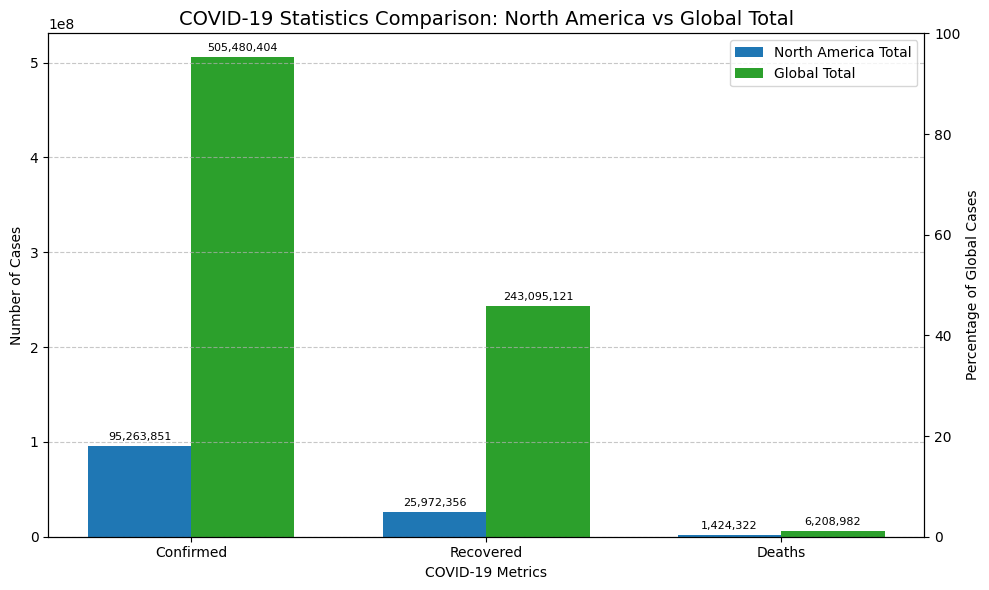

In [59]:
def plot_continent_by_total(continent: str):
    df = pd.DataFrame(covid_19_dataset)

    # Get countries in the specified continent
    countries = regions_dataset[regions_dataset['Continent'] == continent]
    countries = countries['Country']
    
    # Convert Date column to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'])
    
    # 1. Get all data for the specified continent
    continent_data = df[df['Country'].isin(countries)]
    
    # Calculate the total for the continent across all time
    continent_total_values = continent_data[['Confirmed', 'Recovered', 'Deaths']].sum().values
    
    # 2. Calculate global total for comparison
    global_total_values = df[['Confirmed', 'Recovered', 'Deaths']].sum().values
    
    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.35  # Wider bars since we only have two
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the two sets of bars
    bar1 = ax.bar(x - width/2, continent_total_values, width, 
                 label=f'{continent} Total', color='#1f77b4')
    bar2 = ax.bar(x + width/2, global_total_values, width, 
                 label=f'Global Total', color='#2ca02c')
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=10)
    ax.set_ylabel('Number of Cases', fontsize=10)
    ax.set_title(f'COVID-19 Statistics Comparison: {continent} vs Global Total', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=10)
    ax.legend(fontsize=10)
    
    # Add counts above bars with NaN handling
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            label_text = f'{int(height):,}'
                
            ax.annotate(label_text,
                      xy=(bar.get_x() + bar.get_width() / 2, height if not np.isnan(height) else 0),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', fontsize=8)
    
    add_labels(bar1)
    add_labels(bar2)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    
    # Print the numerical results for reference
    print(f"{continent} total COVID-19 statistics:")
    for category, value in zip(categories, continent_total_values):
        if np.isnan(value):
            print(f"  {category}: N/A")
        else:
            print(f"  {category}: {value:.0f}")
    
    print(f"\nGlobal total COVID-19 statistics:")
    for category, value in zip(categories, global_total_values):
        if np.isnan(value):
            print(f"  {category}: N/A")
        else:
            print(f"  {category}: {value:.0f}")
    
    # Add a second y-axis to show the percentage
    ax2 = ax.twinx()
    ax2.set_ylabel('Percentage of Global Cases', fontsize=10)
    ax2.set_ylim(0, 100)  # Percentage scale
    
    plt.tight_layout()
    plt.show()

plot_continent_by_total('North America')